In [229]:
import numpy as np
from numpy import linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import glob
import math
import statistics as st
from random import choices

import import_ipynb

from testDataCreation import random_finished_dag
from testDataCreation import cycleMatrix
from testDataCreation import initGraph



test_data/rand_finished_DAG_N10_E10.txt
[[0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


True

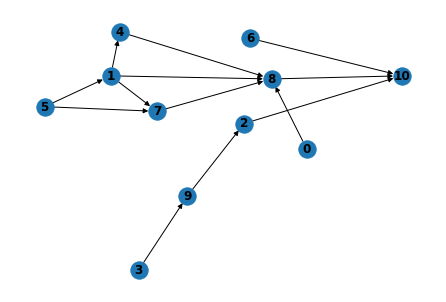

In [4]:
for file_name in glob.iglob('test_data/*N10_E10.txt', recursive=True):
    M = np.loadtxt(file_name, dtype=int)
    print(file_name)
    print(M)
    break

DG = initGraph(M)

nx.draw(DG, with_labels=True, font_weight='bold')
nx.is_directed_acyclic_graph(DG)

In [5]:
list(nx.topological_sort(DG))

[6, 5, 1, 7, 4, 3, 9, 2, 0, 8, 10]

[(0, {'execution_time': 10, 'fix_time': 30, 'fail_probability': 0, 'status': 'Not Started', 'start_time': 'Not filled', 'end_time': 'Not filled'}), (8, {'execution_time': 10, 'fix_time': 30, 'fail_probability': 0, 'status': 'Not Started', 'start_time': 'Not filled', 'end_time': 'Not filled'}), (1, {'execution_time': 10, 'fix_time': 30, 'fail_probability': 0.9, 'status': 'Not Started', 'start_time': 'Not filled', 'end_time': 'Not filled'}), (4, {'execution_time': 10, 'fix_time': 30, 'fail_probability': 0.5, 'status': 'Not Started', 'start_time': 'Not filled', 'end_time': 'Not filled'}), (7, {'execution_time': 10, 'fix_time': 30, 'fail_probability': 0, 'status': 'Not Started', 'start_time': 'Not filled', 'end_time': 'Not filled'}), (2, {'execution_time': 10, 'fix_time': 30, 'fail_probability': 0, 'status': 'Not Started', 'start_time': 'Not filled', 'end_time': 'Not filled'}), (10, {'execution_time': 10, 'fix_time': 30, 'fail_probability': 0, 'status': 'Not Started', 'start_time': 'Not fi

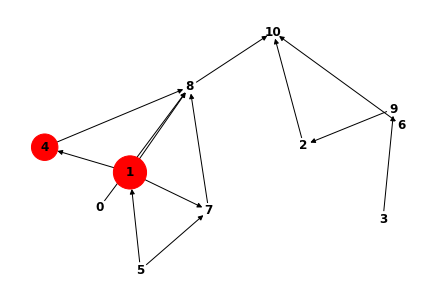

In [6]:
def add_fixed_params_to_graph(DG):
    for node in DG.nodes:
        DG.add_node(node, execution_time=10)
        DG.add_node(node, fix_time=30)
        DG.add_node(node, fail_probability=0)
        DG.add_node(node, status='Not Started')
        DG.add_node(node, start_time='Not filled')
        DG.add_node(node, end_time='Not filled')
    DG.add_node(1, fail_probability=0.9)
    DG.add_node(4, fail_probability=0.5)
        
add_fixed_params_to_graph(DG)
print(DG.nodes.data())

def getColor(DG, i):
    if (DG.nodes[i]['fail_probability'] != 0):
        return 'red'
    else:
        return 'white'

def show_DG_with_fail_probability(DG, coef=1000):
    print(DG.nodes.data())
    node_sizes = [coef*(0.2+DG.nodes[i]['fail_probability']) for i in DG.nodes]
    node_colors = [getColor(DG,i) for i in DG.nodes]
    nx.draw(DG, with_labels=True, font_weight='bold', node_size=node_sizes, node_color=node_colors)
    
show_DG_with_fail_probability(DG)

In [7]:
def count_execution_coverage(DG):
    count = 0
    for node in DG.nodes:
        status = DG.nodes[node]['status']
        if (status == 'Success'):
            count += 1
    return count

In [8]:
def getTotalPredecessors(DG, i):
    pred_set = set()
    if (len(list(DG.predecessors(i))) != 0):
        pred_set |= set(list(DG.predecessors(i)))
        for j in list(DG.predecessors(i)):
            pred_set.update(getTotalPredecessors(DG, j))
    return pred_set

def getSuccessProbability2(DG, node):
    pred_set = getTotalPredecessors(DG, node)
    res = 1-DG.nodes[node]['fail_probability']
    for pred in pred_set:
        res *= 1-DG.nodes[pred]['fail_probability']
        getSuccessProbability2(DG, pred)
    DG.add_node(node, total_success_probability=res)
    return res

def analytical_success_coverage2(DG):
    last_node = len(DG.nodes)-1
    node = last_node
    success_probability = getSuccessProbability2(DG, node)
    res = []
    print("finish")
    for node in DG.nodes():
        print(node)
        print(DG.nodes[node]['total_success_probability'])
        res.append(DG.nodes[node]['total_success_probability'])
    print(res)
    return sum(res)

analytical_success_coverage2(DG)

finish
0
1
8
0.04999999999999999
1
0.09999999999999998
4
0.04999999999999999
7
0.09999999999999998
2
1
10
0.04999999999999999
3
1
9
1
5
1
6
1
[1, 0.04999999999999999, 0.09999999999999998, 0.04999999999999999, 0.09999999999999998, 1, 0.04999999999999999, 1, 1, 1, 1]


6.35

In [9]:
top_sorts = list(nx.all_topological_sorts(DG))
print("Total number of top sorts for DAG: "+str(len(top_sorts)))

Total number of top sorts for DAG: 8400


In [300]:
#Count top_sort_success_rate

def top_sort_success_rate(DG, top_sort):
    res = []
    probs = []
    num = 0
    for node in top_sort:
        num_fail_prob = DG.nodes[node]['fail_probability']
        for prob in probs:
            num_fail_prob *= 1 - prob
        probs.append(num_fail_prob)
        res.append(num*num_fail_prob)
       # print('Number: '+str(num)+'; node: '+str(node)+'; fail prob: '+str(num_fail_prob))
        num += 1
    return sum(res)+len(top_sort)*(1-sum(probs))
    
top_sort = list(nx.topological_sort(DG))
print(top_sort)
top_sort_success_rate(DG, top_sort)

[6, 5, 1, 7, 4, 3, 9, 2, 0, 8, 10]


2.5500000000000007

Sort number 1
[6, 5, 1, 7, 4, 3, 9, 2, 0, 8, 10]
Sort number 2
[6, 5, 1, 7, 4, 3, 9, 0, 8, 2, 10]
Sort number 3
[6, 5, 1, 7, 4, 3, 9, 0, 2, 8, 10]
Sort number 4
[6, 5, 1, 7, 4, 3, 0, 8, 9, 2, 10]
Sort number 5
[6, 5, 1, 7, 4, 3, 0, 9, 2, 8, 10]
Sort number 6
[6, 5, 1, 7, 4, 3, 0, 9, 8, 2, 10]
Sort number 7
[6, 5, 1, 7, 4, 0, 8, 3, 9, 2, 10]
Sort number 8
[6, 5, 1, 7, 4, 0, 3, 9, 2, 8, 10]
Sort number 9
[6, 5, 1, 7, 4, 0, 3, 9, 8, 2, 10]
Sort number 10
[6, 5, 1, 7, 4, 0, 3, 8, 9, 2, 10]
Sort number 11
[6, 5, 1, 7, 3, 9, 2, 0, 4, 8, 10]
Sort number 12
[6, 5, 1, 7, 3, 9, 2, 4, 0, 8, 10]
Sort number 13
[6, 5, 1, 7, 3, 9, 0, 4, 8, 2, 10]
Sort number 14
[6, 5, 1, 7, 3, 9, 0, 4, 2, 8, 10]
Sort number 15
[6, 5, 1, 7, 3, 9, 0, 2, 4, 8, 10]
Sort number 16
[6, 5, 1, 7, 3, 9, 4, 2, 0, 8, 10]
Sort number 17
[6, 5, 1, 7, 3, 9, 4, 0, 8, 2, 10]
Sort number 18
[6, 5, 1, 7, 3, 9, 4, 0, 2, 8, 10]
Sort number 19
[6, 5, 1, 7, 3, 0, 4, 8, 9, 2, 10]
Sort number 20
[6, 5, 1, 7, 3, 0, 4, 9, 2, 8, 10]
Sort numb

Sort number 282
[6, 5, 3, 0, 9, 1, 7, 4, 2, 8, 10]
Sort number 283
[6, 5, 3, 0, 9, 1, 7, 2, 4, 8, 10]
Sort number 284
[6, 5, 3, 0, 9, 1, 4, 2, 7, 8, 10]
Sort number 285
[6, 5, 3, 0, 9, 1, 4, 7, 8, 2, 10]
Sort number 286
[6, 5, 3, 0, 9, 1, 4, 7, 2, 8, 10]
Sort number 287
[6, 5, 3, 0, 9, 1, 2, 7, 4, 8, 10]
Sort number 288
[6, 5, 3, 0, 9, 1, 2, 4, 7, 8, 10]
Sort number 289
[6, 5, 3, 1, 7, 4, 9, 2, 0, 8, 10]
Sort number 290
[6, 5, 3, 1, 7, 4, 9, 0, 8, 2, 10]
Sort number 291
[6, 5, 3, 1, 7, 4, 9, 0, 2, 8, 10]
Sort number 292
[6, 5, 3, 1, 7, 4, 0, 8, 9, 2, 10]
Sort number 293
[6, 5, 3, 1, 7, 4, 0, 9, 2, 8, 10]
Sort number 294
[6, 5, 3, 1, 7, 4, 0, 9, 8, 2, 10]
Sort number 295
[6, 5, 3, 1, 7, 9, 2, 0, 4, 8, 10]
Sort number 296
[6, 5, 3, 1, 7, 9, 2, 4, 0, 8, 10]
Sort number 297
[6, 5, 3, 1, 7, 9, 0, 4, 8, 2, 10]
Sort number 298
[6, 5, 3, 1, 7, 9, 0, 4, 2, 8, 10]
Sort number 299
[6, 5, 3, 1, 7, 9, 0, 2, 4, 8, 10]
Sort number 300
[6, 5, 3, 1, 7, 9, 4, 2, 0, 8, 10]
Sort number 301
[6, 5, 3, 1, 7,

Sort number 589
[6, 3, 5, 1, 4, 0, 7, 8, 9, 2, 10]
Sort number 590
[6, 3, 5, 1, 4, 0, 7, 9, 2, 8, 10]
Sort number 591
[6, 3, 5, 1, 4, 0, 7, 9, 8, 2, 10]
Sort number 592
[6, 3, 5, 1, 4, 0, 9, 2, 7, 8, 10]
Sort number 593
[6, 3, 5, 1, 4, 0, 9, 7, 8, 2, 10]
Sort number 594
[6, 3, 5, 1, 4, 0, 9, 7, 2, 8, 10]
Sort number 595
[6, 3, 5, 1, 4, 7, 9, 2, 0, 8, 10]
Sort number 596
[6, 3, 5, 1, 4, 7, 9, 0, 8, 2, 10]
Sort number 597
[6, 3, 5, 1, 4, 7, 9, 0, 2, 8, 10]
Sort number 598
[6, 3, 5, 1, 4, 7, 0, 8, 9, 2, 10]
Sort number 599
[6, 3, 5, 1, 4, 7, 0, 9, 2, 8, 10]
Sort number 600
[6, 3, 5, 1, 4, 7, 0, 9, 8, 2, 10]
Sort number 601
[6, 3, 5, 1, 9, 2, 0, 7, 4, 8, 10]
Sort number 602
[6, 3, 5, 1, 9, 2, 0, 4, 7, 8, 10]
Sort number 603
[6, 3, 5, 1, 9, 2, 7, 4, 0, 8, 10]
Sort number 604
[6, 3, 5, 1, 9, 2, 7, 0, 4, 8, 10]
Sort number 605
[6, 3, 5, 1, 9, 2, 4, 0, 7, 8, 10]
Sort number 606
[6, 3, 5, 1, 9, 2, 4, 7, 0, 8, 10]
Sort number 607
[6, 3, 5, 1, 9, 0, 7, 4, 8, 2, 10]
Sort number 608
[6, 3, 5, 1, 9,

Sort number 758
[6, 0, 5, 1, 3, 7, 4, 9, 2, 8, 10]
Sort number 759
[6, 0, 5, 1, 3, 7, 4, 9, 8, 2, 10]
Sort number 760
[6, 0, 5, 1, 3, 7, 9, 2, 4, 8, 10]
Sort number 761
[6, 0, 5, 1, 3, 7, 9, 4, 8, 2, 10]
Sort number 762
[6, 0, 5, 1, 3, 7, 9, 4, 2, 8, 10]
Sort number 763
[6, 0, 5, 1, 3, 4, 9, 2, 7, 8, 10]
Sort number 764
[6, 0, 5, 1, 3, 4, 9, 7, 8, 2, 10]
Sort number 765
[6, 0, 5, 1, 3, 4, 9, 7, 2, 8, 10]
Sort number 766
[6, 0, 5, 1, 3, 4, 7, 8, 9, 2, 10]
Sort number 767
[6, 0, 5, 1, 3, 4, 7, 9, 2, 8, 10]
Sort number 768
[6, 0, 5, 1, 3, 4, 7, 9, 8, 2, 10]
Sort number 769
[6, 0, 5, 3, 9, 2, 1, 7, 4, 8, 10]
Sort number 770
[6, 0, 5, 3, 9, 2, 1, 4, 7, 8, 10]
Sort number 771
[6, 0, 5, 3, 9, 1, 7, 4, 8, 2, 10]
Sort number 772
[6, 0, 5, 3, 9, 1, 7, 4, 2, 8, 10]
Sort number 773
[6, 0, 5, 3, 9, 1, 7, 2, 4, 8, 10]
Sort number 774
[6, 0, 5, 3, 9, 1, 4, 2, 7, 8, 10]
Sort number 775
[6, 0, 5, 3, 9, 1, 4, 7, 8, 2, 10]
Sort number 776
[6, 0, 5, 3, 9, 1, 4, 7, 2, 8, 10]
Sort number 777
[6, 0, 5, 3, 9,

Sort number 1063
[5, 1, 7, 0, 3, 6, 4, 8, 9, 2, 10]
Sort number 1064
[5, 1, 7, 0, 3, 6, 4, 9, 2, 8, 10]
Sort number 1065
[5, 1, 7, 0, 3, 6, 4, 9, 8, 2, 10]
Sort number 1066
[5, 1, 7, 0, 3, 6, 9, 2, 4, 8, 10]
Sort number 1067
[5, 1, 7, 0, 3, 6, 9, 4, 8, 2, 10]
Sort number 1068
[5, 1, 7, 0, 3, 6, 9, 4, 2, 8, 10]
Sort number 1069
[5, 1, 7, 0, 3, 4, 8, 9, 2, 6, 10]
Sort number 1070
[5, 1, 7, 0, 3, 4, 8, 9, 6, 2, 10]
Sort number 1071
[5, 1, 7, 0, 3, 4, 8, 6, 9, 2, 10]
Sort number 1072
[5, 1, 7, 0, 3, 4, 9, 2, 6, 8, 10]
Sort number 1073
[5, 1, 7, 0, 3, 4, 9, 2, 8, 6, 10]
Sort number 1074
[5, 1, 7, 0, 3, 4, 9, 6, 8, 2, 10]
Sort number 1075
[5, 1, 7, 0, 3, 4, 9, 6, 2, 8, 10]
Sort number 1076
[5, 1, 7, 0, 3, 4, 9, 8, 2, 6, 10]
Sort number 1077
[5, 1, 7, 0, 3, 4, 9, 8, 6, 2, 10]
Sort number 1078
[5, 1, 7, 0, 3, 4, 6, 8, 9, 2, 10]
Sort number 1079
[5, 1, 7, 0, 3, 4, 6, 9, 2, 8, 10]
Sort number 1080
[5, 1, 7, 0, 3, 4, 6, 9, 8, 2, 10]
Sort number 1081
[5, 1, 7, 6, 4, 3, 9, 2, 0, 8, 10]
Sort number 

Sort number 1223
[5, 1, 4, 3, 7, 0, 8, 6, 9, 2, 10]
Sort number 1224
[5, 1, 4, 3, 7, 0, 8, 9, 2, 6, 10]
Sort number 1225
[5, 1, 4, 3, 7, 0, 8, 9, 6, 2, 10]
Sort number 1226
[5, 1, 4, 3, 7, 0, 6, 9, 2, 8, 10]
Sort number 1227
[5, 1, 4, 3, 7, 0, 6, 9, 8, 2, 10]
Sort number 1228
[5, 1, 4, 3, 7, 0, 6, 8, 9, 2, 10]
Sort number 1229
[5, 1, 4, 3, 7, 0, 9, 2, 8, 6, 10]
Sort number 1230
[5, 1, 4, 3, 7, 0, 9, 2, 6, 8, 10]
Sort number 1231
[5, 1, 4, 3, 7, 0, 9, 8, 6, 2, 10]
Sort number 1232
[5, 1, 4, 3, 7, 0, 9, 8, 2, 6, 10]
Sort number 1233
[5, 1, 4, 3, 7, 0, 9, 6, 2, 8, 10]
Sort number 1234
[5, 1, 4, 3, 7, 0, 9, 6, 8, 2, 10]
Sort number 1235
[5, 1, 4, 3, 7, 6, 9, 2, 0, 8, 10]
Sort number 1236
[5, 1, 4, 3, 7, 6, 9, 0, 8, 2, 10]
Sort number 1237
[5, 1, 4, 3, 7, 6, 9, 0, 2, 8, 10]
Sort number 1238
[5, 1, 4, 3, 7, 6, 0, 8, 9, 2, 10]
Sort number 1239
[5, 1, 4, 3, 7, 6, 0, 9, 2, 8, 10]
Sort number 1240
[5, 1, 4, 3, 7, 6, 0, 9, 8, 2, 10]
Sort number 1241
[5, 1, 4, 0, 6, 7, 8, 3, 9, 2, 10]
Sort number 

Sort number 1508
[5, 1, 3, 9, 7, 4, 0, 2, 8, 6, 10]
Sort number 1509
[5, 1, 3, 9, 7, 4, 0, 2, 6, 8, 10]
Sort number 1510
[5, 1, 3, 9, 7, 4, 6, 2, 0, 8, 10]
Sort number 1511
[5, 1, 3, 9, 7, 4, 6, 0, 8, 2, 10]
Sort number 1512
[5, 1, 3, 9, 7, 4, 6, 0, 2, 8, 10]
Sort number 1513
[5, 1, 3, 9, 7, 2, 0, 6, 4, 8, 10]
Sort number 1514
[5, 1, 3, 9, 7, 2, 0, 4, 8, 6, 10]
Sort number 1515
[5, 1, 3, 9, 7, 2, 0, 4, 6, 8, 10]
Sort number 1516
[5, 1, 3, 9, 7, 2, 6, 4, 0, 8, 10]
Sort number 1517
[5, 1, 3, 9, 7, 2, 6, 0, 4, 8, 10]
Sort number 1518
[5, 1, 3, 9, 7, 2, 4, 0, 8, 6, 10]
Sort number 1519
[5, 1, 3, 9, 7, 2, 4, 0, 6, 8, 10]
Sort number 1520
[5, 1, 3, 9, 7, 2, 4, 6, 0, 8, 10]
Sort number 1521
[5, 1, 3, 9, 7, 0, 6, 4, 8, 2, 10]
Sort number 1522
[5, 1, 3, 9, 7, 0, 6, 4, 2, 8, 10]
Sort number 1523
[5, 1, 3, 9, 7, 0, 6, 2, 4, 8, 10]
Sort number 1524
[5, 1, 3, 9, 7, 0, 4, 8, 2, 6, 10]
Sort number 1525
[5, 1, 3, 9, 7, 0, 4, 8, 6, 2, 10]
Sort number 1526
[5, 1, 3, 9, 7, 0, 4, 2, 6, 8, 10]
Sort number 

Sort number 1712
[5, 1, 3, 6, 7, 9, 4, 2, 0, 8, 10]
Sort number 1713
[5, 1, 3, 6, 7, 9, 4, 0, 8, 2, 10]
Sort number 1714
[5, 1, 3, 6, 7, 9, 4, 0, 2, 8, 10]
Sort number 1715
[5, 1, 3, 6, 7, 0, 4, 8, 9, 2, 10]
Sort number 1716
[5, 1, 3, 6, 7, 0, 4, 9, 2, 8, 10]
Sort number 1717
[5, 1, 3, 6, 7, 0, 4, 9, 8, 2, 10]
Sort number 1718
[5, 1, 3, 6, 7, 0, 9, 2, 4, 8, 10]
Sort number 1719
[5, 1, 3, 6, 7, 0, 9, 4, 8, 2, 10]
Sort number 1720
[5, 1, 3, 6, 7, 0, 9, 4, 2, 8, 10]
Sort number 1721
[5, 1, 3, 6, 4, 9, 2, 0, 7, 8, 10]
Sort number 1722
[5, 1, 3, 6, 4, 9, 2, 7, 0, 8, 10]
Sort number 1723
[5, 1, 3, 6, 4, 9, 0, 7, 8, 2, 10]
Sort number 1724
[5, 1, 3, 6, 4, 9, 0, 7, 2, 8, 10]
Sort number 1725
[5, 1, 3, 6, 4, 9, 0, 2, 7, 8, 10]
Sort number 1726
[5, 1, 3, 6, 4, 9, 7, 2, 0, 8, 10]
Sort number 1727
[5, 1, 3, 6, 4, 9, 7, 0, 8, 2, 10]
Sort number 1728
[5, 1, 3, 6, 4, 9, 7, 0, 2, 8, 10]
Sort number 1729
[5, 1, 3, 6, 4, 0, 7, 8, 9, 2, 10]
Sort number 1730
[5, 1, 3, 6, 4, 0, 7, 9, 2, 8, 10]
Sort number 

Sort number 1900
[5, 1, 3, 7, 6, 9, 0, 4, 2, 8, 10]
Sort number 1901
[5, 1, 3, 7, 6, 9, 0, 2, 4, 8, 10]
Sort number 1902
[5, 1, 3, 7, 6, 9, 4, 2, 0, 8, 10]
Sort number 1903
[5, 1, 3, 7, 6, 9, 4, 0, 8, 2, 10]
Sort number 1904
[5, 1, 3, 7, 6, 9, 4, 0, 2, 8, 10]
Sort number 1905
[5, 1, 3, 7, 6, 0, 4, 8, 9, 2, 10]
Sort number 1906
[5, 1, 3, 7, 6, 0, 4, 9, 2, 8, 10]
Sort number 1907
[5, 1, 3, 7, 6, 0, 4, 9, 8, 2, 10]
Sort number 1908
[5, 1, 3, 7, 6, 0, 9, 2, 4, 8, 10]
Sort number 1909
[5, 1, 3, 7, 6, 0, 9, 4, 8, 2, 10]
Sort number 1910
[5, 1, 3, 7, 6, 0, 9, 4, 2, 8, 10]
Sort number 1911
[5, 1, 3, 4, 9, 2, 0, 6, 7, 8, 10]
Sort number 1912
[5, 1, 3, 4, 9, 2, 0, 7, 8, 6, 10]
Sort number 1913
[5, 1, 3, 4, 9, 2, 0, 7, 6, 8, 10]
Sort number 1914
[5, 1, 3, 4, 9, 2, 6, 7, 0, 8, 10]
Sort number 1915
[5, 1, 3, 4, 9, 2, 6, 0, 7, 8, 10]
Sort number 1916
[5, 1, 3, 4, 9, 2, 7, 0, 8, 6, 10]
Sort number 1917
[5, 1, 3, 4, 9, 2, 7, 0, 6, 8, 10]
Sort number 1918
[5, 1, 3, 4, 9, 2, 7, 6, 0, 8, 10]
Sort number 

[5, 1, 0, 7, 4, 3, 9, 2, 8, 6, 10]
Sort number 2077
[5, 1, 0, 7, 4, 3, 9, 6, 8, 2, 10]
Sort number 2078
[5, 1, 0, 7, 4, 3, 9, 6, 2, 8, 10]
Sort number 2079
[5, 1, 0, 7, 4, 3, 9, 8, 2, 6, 10]
Sort number 2080
[5, 1, 0, 7, 4, 3, 9, 8, 6, 2, 10]
Sort number 2081
[5, 1, 0, 7, 4, 3, 6, 8, 9, 2, 10]
Sort number 2082
[5, 1, 0, 7, 4, 3, 6, 9, 2, 8, 10]
Sort number 2083
[5, 1, 0, 7, 4, 3, 6, 9, 8, 2, 10]
Sort number 2084
[5, 1, 0, 7, 4, 3, 8, 9, 2, 6, 10]
Sort number 2085
[5, 1, 0, 7, 4, 3, 8, 9, 6, 2, 10]
Sort number 2086
[5, 1, 0, 7, 4, 3, 8, 6, 9, 2, 10]
Sort number 2087
[5, 1, 0, 7, 4, 6, 8, 3, 9, 2, 10]
Sort number 2088
[5, 1, 0, 7, 4, 6, 3, 9, 2, 8, 10]
Sort number 2089
[5, 1, 0, 7, 4, 6, 3, 9, 8, 2, 10]
Sort number 2090
[5, 1, 0, 7, 4, 6, 3, 8, 9, 2, 10]
Sort number 2091
[5, 1, 0, 7, 3, 9, 2, 6, 4, 8, 10]
Sort number 2092
[5, 1, 0, 7, 3, 9, 2, 4, 8, 6, 10]
Sort number 2093
[5, 1, 0, 7, 3, 9, 2, 4, 6, 8, 10]
Sort number 2094
[5, 1, 0, 7, 3, 9, 6, 4, 8, 2, 10]
Sort number 2095
[5, 1, 0, 7,

Sort number 2294
[5, 1, 0, 3, 4, 6, 7, 9, 2, 8, 10]
Sort number 2295
[5, 1, 0, 3, 4, 6, 7, 9, 8, 2, 10]
Sort number 2296
[5, 1, 0, 3, 4, 6, 9, 2, 7, 8, 10]
Sort number 2297
[5, 1, 0, 3, 4, 6, 9, 7, 8, 2, 10]
Sort number 2298
[5, 1, 0, 3, 4, 6, 9, 7, 2, 8, 10]
Sort number 2299
[5, 1, 0, 3, 4, 7, 8, 9, 2, 6, 10]
Sort number 2300
[5, 1, 0, 3, 4, 7, 8, 9, 6, 2, 10]
Sort number 2301
[5, 1, 0, 3, 4, 7, 8, 6, 9, 2, 10]
Sort number 2302
[5, 1, 0, 3, 4, 7, 9, 2, 6, 8, 10]
Sort number 2303
[5, 1, 0, 3, 4, 7, 9, 2, 8, 6, 10]
Sort number 2304
[5, 1, 0, 3, 4, 7, 9, 6, 8, 2, 10]
Sort number 2305
[5, 1, 0, 3, 4, 7, 9, 6, 2, 8, 10]
Sort number 2306
[5, 1, 0, 3, 4, 7, 9, 8, 2, 6, 10]
Sort number 2307
[5, 1, 0, 3, 4, 7, 9, 8, 6, 2, 10]
Sort number 2308
[5, 1, 0, 3, 4, 7, 6, 8, 9, 2, 10]
Sort number 2309
[5, 1, 0, 3, 4, 7, 6, 9, 2, 8, 10]
Sort number 2310
[5, 1, 0, 3, 4, 7, 6, 9, 8, 2, 10]
Sort number 2311
[5, 1, 6, 7, 4, 3, 9, 2, 0, 8, 10]
Sort number 2312
[5, 1, 6, 7, 4, 3, 9, 0, 8, 2, 10]
Sort number 

Sort number 2585
[5, 3, 9, 0, 1, 7, 2, 6, 4, 8, 10]
Sort number 2586
[5, 3, 9, 0, 1, 7, 2, 4, 8, 6, 10]
Sort number 2587
[5, 3, 9, 0, 1, 7, 2, 4, 6, 8, 10]
Sort number 2588
[5, 3, 9, 0, 1, 7, 6, 4, 8, 2, 10]
Sort number 2589
[5, 3, 9, 0, 1, 7, 6, 4, 2, 8, 10]
Sort number 2590
[5, 3, 9, 0, 1, 7, 6, 2, 4, 8, 10]
Sort number 2591
[5, 3, 9, 0, 1, 4, 2, 6, 7, 8, 10]
Sort number 2592
[5, 3, 9, 0, 1, 4, 2, 7, 8, 6, 10]
Sort number 2593
[5, 3, 9, 0, 1, 4, 2, 7, 6, 8, 10]
Sort number 2594
[5, 3, 9, 0, 1, 4, 6, 7, 8, 2, 10]
Sort number 2595
[5, 3, 9, 0, 1, 4, 6, 7, 2, 8, 10]
Sort number 2596
[5, 3, 9, 0, 1, 4, 6, 2, 7, 8, 10]
Sort number 2597
[5, 3, 9, 0, 1, 4, 7, 8, 2, 6, 10]
Sort number 2598
[5, 3, 9, 0, 1, 4, 7, 8, 6, 2, 10]
Sort number 2599
[5, 3, 9, 0, 1, 4, 7, 2, 6, 8, 10]
Sort number 2600
[5, 3, 9, 0, 1, 4, 7, 2, 8, 6, 10]
Sort number 2601
[5, 3, 9, 0, 1, 4, 7, 6, 8, 2, 10]
Sort number 2602
[5, 3, 9, 0, 1, 4, 7, 6, 2, 8, 10]
Sort number 2603
[5, 3, 9, 0, 1, 2, 6, 7, 4, 8, 10]
Sort number 

Sort number 2901
[5, 3, 0, 1, 7, 9, 2, 4, 6, 8, 10]
Sort number 2902
[5, 3, 0, 1, 7, 9, 6, 4, 8, 2, 10]
Sort number 2903
[5, 3, 0, 1, 7, 9, 6, 4, 2, 8, 10]
Sort number 2904
[5, 3, 0, 1, 7, 9, 6, 2, 4, 8, 10]
Sort number 2905
[5, 3, 0, 1, 7, 9, 4, 8, 2, 6, 10]
Sort number 2906
[5, 3, 0, 1, 7, 9, 4, 8, 6, 2, 10]
Sort number 2907
[5, 3, 0, 1, 7, 9, 4, 2, 6, 8, 10]
Sort number 2908
[5, 3, 0, 1, 7, 9, 4, 2, 8, 6, 10]
Sort number 2909
[5, 3, 0, 1, 7, 9, 4, 6, 8, 2, 10]
Sort number 2910
[5, 3, 0, 1, 7, 9, 4, 6, 2, 8, 10]
Sort number 2911
[5, 3, 0, 1, 7, 6, 4, 8, 9, 2, 10]
Sort number 2912
[5, 3, 0, 1, 7, 6, 4, 9, 2, 8, 10]
Sort number 2913
[5, 3, 0, 1, 7, 6, 4, 9, 8, 2, 10]
Sort number 2914
[5, 3, 0, 1, 7, 6, 9, 2, 4, 8, 10]
Sort number 2915
[5, 3, 0, 1, 7, 6, 9, 4, 8, 2, 10]
Sort number 2916
[5, 3, 0, 1, 7, 6, 9, 4, 2, 8, 10]
Sort number 2917
[5, 3, 0, 1, 4, 9, 2, 6, 7, 8, 10]
Sort number 2918
[5, 3, 0, 1, 4, 9, 2, 7, 8, 6, 10]
Sort number 2919
[5, 3, 0, 1, 4, 9, 2, 7, 6, 8, 10]
Sort number 

Sort number 3191
[5, 3, 6, 9, 1, 2, 0, 7, 4, 8, 10]
Sort number 3192
[5, 3, 6, 9, 1, 2, 0, 4, 7, 8, 10]
Sort number 3193
[5, 3, 6, 9, 1, 2, 7, 4, 0, 8, 10]
Sort number 3194
[5, 3, 6, 9, 1, 2, 7, 0, 4, 8, 10]
Sort number 3195
[5, 3, 6, 9, 1, 2, 4, 0, 7, 8, 10]
Sort number 3196
[5, 3, 6, 9, 1, 2, 4, 7, 0, 8, 10]
Sort number 3197
[5, 3, 6, 9, 1, 0, 7, 4, 8, 2, 10]
Sort number 3198
[5, 3, 6, 9, 1, 0, 7, 4, 2, 8, 10]
Sort number 3199
[5, 3, 6, 9, 1, 0, 7, 2, 4, 8, 10]
Sort number 3200
[5, 3, 6, 9, 1, 0, 4, 2, 7, 8, 10]
Sort number 3201
[5, 3, 6, 9, 1, 0, 4, 7, 8, 2, 10]
Sort number 3202
[5, 3, 6, 9, 1, 0, 4, 7, 2, 8, 10]
Sort number 3203
[5, 3, 6, 9, 1, 0, 2, 7, 4, 8, 10]
Sort number 3204
[5, 3, 6, 9, 1, 0, 2, 4, 7, 8, 10]
Sort number 3205
[5, 3, 6, 0, 1, 7, 4, 8, 9, 2, 10]
Sort number 3206
[5, 3, 6, 0, 1, 7, 4, 9, 2, 8, 10]
Sort number 3207
[5, 3, 6, 0, 1, 7, 4, 9, 8, 2, 10]
Sort number 3208
[5, 3, 6, 0, 1, 7, 9, 2, 4, 8, 10]
Sort number 3209
[5, 3, 6, 0, 1, 7, 9, 4, 8, 2, 10]
Sort number 

Sort number 3349
[5, 3, 1, 7, 6, 0, 4, 8, 9, 2, 10]
Sort number 3350
[5, 3, 1, 7, 6, 0, 4, 9, 2, 8, 10]
Sort number 3351
[5, 3, 1, 7, 6, 0, 4, 9, 8, 2, 10]
Sort number 3352
[5, 3, 1, 7, 6, 0, 9, 2, 4, 8, 10]
Sort number 3353
[5, 3, 1, 7, 6, 0, 9, 4, 8, 2, 10]
Sort number 3354
[5, 3, 1, 7, 6, 0, 9, 4, 2, 8, 10]
Sort number 3355
[5, 3, 1, 4, 9, 2, 0, 6, 7, 8, 10]
Sort number 3356
[5, 3, 1, 4, 9, 2, 0, 7, 8, 6, 10]
Sort number 3357
[5, 3, 1, 4, 9, 2, 0, 7, 6, 8, 10]
Sort number 3358
[5, 3, 1, 4, 9, 2, 6, 7, 0, 8, 10]
Sort number 3359
[5, 3, 1, 4, 9, 2, 6, 0, 7, 8, 10]
Sort number 3360
[5, 3, 1, 4, 9, 2, 7, 0, 8, 6, 10]
Sort number 3361
[5, 3, 1, 4, 9, 2, 7, 0, 6, 8, 10]
Sort number 3362
[5, 3, 1, 4, 9, 2, 7, 6, 0, 8, 10]
Sort number 3363
[5, 3, 1, 4, 9, 0, 6, 7, 8, 2, 10]
Sort number 3364
[5, 3, 1, 4, 9, 0, 6, 7, 2, 8, 10]
Sort number 3365
[5, 3, 1, 4, 9, 0, 6, 2, 7, 8, 10]
Sort number 3366
[5, 3, 1, 4, 9, 0, 7, 8, 2, 6, 10]
Sort number 3367
[5, 3, 1, 4, 9, 0, 7, 8, 6, 2, 10]
Sort number 

Sort number 3657
[5, 3, 1, 0, 6, 7, 4, 9, 8, 2, 10]
Sort number 3658
[5, 3, 1, 0, 6, 7, 9, 2, 4, 8, 10]
Sort number 3659
[5, 3, 1, 0, 6, 7, 9, 4, 8, 2, 10]
Sort number 3660
[5, 3, 1, 0, 6, 7, 9, 4, 2, 8, 10]
Sort number 3661
[5, 3, 1, 0, 6, 4, 9, 2, 7, 8, 10]
Sort number 3662
[5, 3, 1, 0, 6, 4, 9, 7, 8, 2, 10]
Sort number 3663
[5, 3, 1, 0, 6, 4, 9, 7, 2, 8, 10]
Sort number 3664
[5, 3, 1, 0, 6, 4, 7, 8, 9, 2, 10]
Sort number 3665
[5, 3, 1, 0, 6, 4, 7, 9, 2, 8, 10]
Sort number 3666
[5, 3, 1, 0, 6, 4, 7, 9, 8, 2, 10]
Sort number 3667
[5, 3, 1, 0, 6, 9, 2, 7, 4, 8, 10]
Sort number 3668
[5, 3, 1, 0, 6, 9, 2, 4, 7, 8, 10]
Sort number 3669
[5, 3, 1, 0, 6, 9, 7, 4, 8, 2, 10]
Sort number 3670
[5, 3, 1, 0, 6, 9, 7, 4, 2, 8, 10]
Sort number 3671
[5, 3, 1, 0, 6, 9, 7, 2, 4, 8, 10]
Sort number 3672
[5, 3, 1, 0, 6, 9, 4, 2, 7, 8, 10]
Sort number 3673
[5, 3, 1, 0, 6, 9, 4, 7, 8, 2, 10]
Sort number 3674
[5, 3, 1, 0, 6, 9, 4, 7, 2, 8, 10]
Sort number 3675
[5, 3, 1, 0, 7, 4, 8, 9, 2, 6, 10]
Sort number 

Sort number 3816
[5, 3, 1, 6, 9, 2, 0, 4, 7, 8, 10]
Sort number 3817
[5, 3, 1, 6, 9, 2, 7, 4, 0, 8, 10]
Sort number 3818
[5, 3, 1, 6, 9, 2, 7, 0, 4, 8, 10]
Sort number 3819
[5, 3, 1, 6, 9, 2, 4, 0, 7, 8, 10]
Sort number 3820
[5, 3, 1, 6, 9, 2, 4, 7, 0, 8, 10]
Sort number 3821
[5, 3, 1, 6, 9, 0, 7, 4, 8, 2, 10]
Sort number 3822
[5, 3, 1, 6, 9, 0, 7, 4, 2, 8, 10]
Sort number 3823
[5, 3, 1, 6, 9, 0, 7, 2, 4, 8, 10]
Sort number 3824
[5, 3, 1, 6, 9, 0, 4, 2, 7, 8, 10]
Sort number 3825
[5, 3, 1, 6, 9, 0, 4, 7, 8, 2, 10]
Sort number 3826
[5, 3, 1, 6, 9, 0, 4, 7, 2, 8, 10]
Sort number 3827
[5, 3, 1, 6, 9, 0, 2, 7, 4, 8, 10]
Sort number 3828
[5, 3, 1, 6, 9, 0, 2, 4, 7, 8, 10]
Sort number 3829
[5, 3, 1, 6, 9, 7, 4, 2, 0, 8, 10]
Sort number 3830
[5, 3, 1, 6, 9, 7, 4, 0, 8, 2, 10]
Sort number 3831
[5, 3, 1, 6, 9, 7, 4, 0, 2, 8, 10]
Sort number 3832
[5, 3, 1, 6, 9, 7, 2, 0, 4, 8, 10]
Sort number 3833
[5, 3, 1, 6, 9, 7, 2, 4, 0, 8, 10]
Sort number 3834
[5, 3, 1, 6, 9, 7, 0, 4, 8, 2, 10]
Sort number 

Sort number 4125
[5, 0, 1, 3, 7, 4, 6, 9, 2, 8, 10]
Sort number 4126
[5, 0, 1, 3, 7, 4, 6, 9, 8, 2, 10]
Sort number 4127
[5, 0, 1, 3, 7, 9, 2, 6, 4, 8, 10]
Sort number 4128
[5, 0, 1, 3, 7, 9, 2, 4, 8, 6, 10]
Sort number 4129
[5, 0, 1, 3, 7, 9, 2, 4, 6, 8, 10]
Sort number 4130
[5, 0, 1, 3, 7, 9, 6, 4, 8, 2, 10]
Sort number 4131
[5, 0, 1, 3, 7, 9, 6, 4, 2, 8, 10]
Sort number 4132
[5, 0, 1, 3, 7, 9, 6, 2, 4, 8, 10]
Sort number 4133
[5, 0, 1, 3, 7, 9, 4, 8, 2, 6, 10]
Sort number 4134
[5, 0, 1, 3, 7, 9, 4, 8, 6, 2, 10]
Sort number 4135
[5, 0, 1, 3, 7, 9, 4, 2, 6, 8, 10]
Sort number 4136
[5, 0, 1, 3, 7, 9, 4, 2, 8, 6, 10]
Sort number 4137
[5, 0, 1, 3, 7, 9, 4, 6, 8, 2, 10]
Sort number 4138
[5, 0, 1, 3, 7, 9, 4, 6, 2, 8, 10]
Sort number 4139
[5, 0, 1, 3, 7, 6, 4, 8, 9, 2, 10]
Sort number 4140
[5, 0, 1, 3, 7, 6, 4, 9, 2, 8, 10]
Sort number 4141
[5, 0, 1, 3, 7, 6, 4, 9, 8, 2, 10]
Sort number 4142
[5, 0, 1, 3, 7, 6, 9, 2, 4, 8, 10]
Sort number 4143
[5, 0, 1, 3, 7, 6, 9, 4, 8, 2, 10]
Sort number 

Sort number 4437
[5, 6, 1, 7, 3, 9, 0, 4, 8, 2, 10]
Sort number 4438
[5, 6, 1, 7, 3, 9, 0, 4, 2, 8, 10]
Sort number 4439
[5, 6, 1, 7, 3, 9, 0, 2, 4, 8, 10]
Sort number 4440
[5, 6, 1, 7, 3, 9, 4, 2, 0, 8, 10]
Sort number 4441
[5, 6, 1, 7, 3, 9, 4, 0, 8, 2, 10]
Sort number 4442
[5, 6, 1, 7, 3, 9, 4, 0, 2, 8, 10]
Sort number 4443
[5, 6, 1, 7, 3, 0, 4, 8, 9, 2, 10]
Sort number 4444
[5, 6, 1, 7, 3, 0, 4, 9, 2, 8, 10]
Sort number 4445
[5, 6, 1, 7, 3, 0, 4, 9, 8, 2, 10]
Sort number 4446
[5, 6, 1, 7, 3, 0, 9, 2, 4, 8, 10]
Sort number 4447
[5, 6, 1, 7, 3, 0, 9, 4, 8, 2, 10]
Sort number 4448
[5, 6, 1, 7, 3, 0, 9, 4, 2, 8, 10]
Sort number 4449
[5, 6, 1, 7, 3, 4, 9, 2, 0, 8, 10]
Sort number 4450
[5, 6, 1, 7, 3, 4, 9, 0, 8, 2, 10]
Sort number 4451
[5, 6, 1, 7, 3, 4, 9, 0, 2, 8, 10]
Sort number 4452
[5, 6, 1, 7, 3, 4, 0, 8, 9, 2, 10]
Sort number 4453
[5, 6, 1, 7, 3, 4, 0, 9, 2, 8, 10]
Sort number 4454
[5, 6, 1, 7, 3, 4, 0, 9, 8, 2, 10]
Sort number 4455
[5, 6, 1, 7, 0, 4, 8, 3, 9, 2, 10]
Sort number 

Sort number 4705
[5, 6, 3, 0, 9, 1, 7, 4, 8, 2, 10]
Sort number 4706
[5, 6, 3, 0, 9, 1, 7, 4, 2, 8, 10]
Sort number 4707
[5, 6, 3, 0, 9, 1, 7, 2, 4, 8, 10]
Sort number 4708
[5, 6, 3, 0, 9, 1, 4, 2, 7, 8, 10]
Sort number 4709
[5, 6, 3, 0, 9, 1, 4, 7, 8, 2, 10]
Sort number 4710
[5, 6, 3, 0, 9, 1, 4, 7, 2, 8, 10]
Sort number 4711
[5, 6, 3, 0, 9, 1, 2, 7, 4, 8, 10]
Sort number 4712
[5, 6, 3, 0, 9, 1, 2, 4, 7, 8, 10]
Sort number 4713
[5, 6, 3, 1, 7, 4, 9, 2, 0, 8, 10]
Sort number 4714
[5, 6, 3, 1, 7, 4, 9, 0, 8, 2, 10]
Sort number 4715
[5, 6, 3, 1, 7, 4, 9, 0, 2, 8, 10]
Sort number 4716
[5, 6, 3, 1, 7, 4, 0, 8, 9, 2, 10]
Sort number 4717
[5, 6, 3, 1, 7, 4, 0, 9, 2, 8, 10]
Sort number 4718
[5, 6, 3, 1, 7, 4, 0, 9, 8, 2, 10]
Sort number 4719
[5, 6, 3, 1, 7, 9, 2, 0, 4, 8, 10]
Sort number 4720
[5, 6, 3, 1, 7, 9, 2, 4, 0, 8, 10]
Sort number 4721
[5, 6, 3, 1, 7, 9, 0, 4, 8, 2, 10]
Sort number 4722
[5, 6, 3, 1, 7, 9, 0, 4, 2, 8, 10]
Sort number 4723
[5, 6, 3, 1, 7, 9, 0, 2, 4, 8, 10]
Sort number 

Sort number 4864
[5, 6, 0, 3, 1, 4, 7, 9, 8, 2, 10]
Sort number 4865
[5, 6, 0, 3, 1, 9, 2, 7, 4, 8, 10]
Sort number 4866
[5, 6, 0, 3, 1, 9, 2, 4, 7, 8, 10]
Sort number 4867
[5, 6, 0, 3, 1, 9, 7, 4, 8, 2, 10]
Sort number 4868
[5, 6, 0, 3, 1, 9, 7, 4, 2, 8, 10]
Sort number 4869
[5, 6, 0, 3, 1, 9, 7, 2, 4, 8, 10]
Sort number 4870
[5, 6, 0, 3, 1, 9, 4, 2, 7, 8, 10]
Sort number 4871
[5, 6, 0, 3, 1, 9, 4, 7, 8, 2, 10]
Sort number 4872
[5, 6, 0, 3, 1, 9, 4, 7, 2, 8, 10]
Sort number 4873
[3, 9, 2, 0, 6, 5, 1, 7, 4, 8, 10]
Sort number 4874
[3, 9, 2, 0, 6, 5, 1, 4, 7, 8, 10]
Sort number 4875
[3, 9, 2, 0, 5, 1, 7, 4, 8, 6, 10]
Sort number 4876
[3, 9, 2, 0, 5, 1, 7, 4, 6, 8, 10]
Sort number 4877
[3, 9, 2, 0, 5, 1, 7, 6, 4, 8, 10]
Sort number 4878
[3, 9, 2, 0, 5, 1, 4, 6, 7, 8, 10]
Sort number 4879
[3, 9, 2, 0, 5, 1, 4, 7, 8, 6, 10]
Sort number 4880
[3, 9, 2, 0, 5, 1, 4, 7, 6, 8, 10]
Sort number 4881
[3, 9, 2, 0, 5, 1, 6, 7, 4, 8, 10]
Sort number 4882
[3, 9, 2, 0, 5, 1, 6, 4, 7, 8, 10]
Sort number 

Sort number 5181
[3, 9, 5, 1, 2, 0, 7, 6, 4, 8, 10]
Sort number 5182
[3, 9, 5, 1, 2, 0, 4, 6, 7, 8, 10]
Sort number 5183
[3, 9, 5, 1, 2, 0, 4, 7, 8, 6, 10]
Sort number 5184
[3, 9, 5, 1, 2, 0, 4, 7, 6, 8, 10]
Sort number 5185
[3, 9, 5, 1, 2, 6, 7, 4, 0, 8, 10]
Sort number 5186
[3, 9, 5, 1, 2, 6, 7, 0, 4, 8, 10]
Sort number 5187
[3, 9, 5, 1, 2, 6, 4, 0, 7, 8, 10]
Sort number 5188
[3, 9, 5, 1, 2, 6, 4, 7, 0, 8, 10]
Sort number 5189
[3, 9, 5, 1, 2, 6, 0, 7, 4, 8, 10]
Sort number 5190
[3, 9, 5, 1, 2, 6, 0, 4, 7, 8, 10]
Sort number 5191
[3, 9, 5, 1, 2, 7, 4, 0, 8, 6, 10]
Sort number 5192
[3, 9, 5, 1, 2, 7, 4, 0, 6, 8, 10]
Sort number 5193
[3, 9, 5, 1, 2, 7, 4, 6, 0, 8, 10]
Sort number 5194
[3, 9, 5, 1, 2, 7, 0, 6, 4, 8, 10]
Sort number 5195
[3, 9, 5, 1, 2, 7, 0, 4, 8, 6, 10]
Sort number 5196
[3, 9, 5, 1, 2, 7, 0, 4, 6, 8, 10]
Sort number 5197
[3, 9, 5, 1, 2, 7, 6, 4, 0, 8, 10]
Sort number 5198
[3, 9, 5, 1, 2, 7, 6, 0, 4, 8, 10]
Sort number 5199
[3, 9, 5, 1, 2, 4, 0, 6, 7, 8, 10]
Sort number 

Sort number 5341
[3, 9, 5, 0, 1, 7, 2, 6, 4, 8, 10]
Sort number 5342
[3, 9, 5, 0, 1, 7, 2, 4, 8, 6, 10]
Sort number 5343
[3, 9, 5, 0, 1, 7, 2, 4, 6, 8, 10]
Sort number 5344
[3, 9, 5, 0, 1, 7, 6, 4, 8, 2, 10]
Sort number 5345
[3, 9, 5, 0, 1, 7, 6, 4, 2, 8, 10]
Sort number 5346
[3, 9, 5, 0, 1, 7, 6, 2, 4, 8, 10]
Sort number 5347
[3, 9, 5, 0, 1, 4, 2, 6, 7, 8, 10]
Sort number 5348
[3, 9, 5, 0, 1, 4, 2, 7, 8, 6, 10]
Sort number 5349
[3, 9, 5, 0, 1, 4, 2, 7, 6, 8, 10]
Sort number 5350
[3, 9, 5, 0, 1, 4, 6, 7, 8, 2, 10]
Sort number 5351
[3, 9, 5, 0, 1, 4, 6, 7, 2, 8, 10]
Sort number 5352
[3, 9, 5, 0, 1, 4, 6, 2, 7, 8, 10]
Sort number 5353
[3, 9, 5, 0, 1, 4, 7, 8, 2, 6, 10]
Sort number 5354
[3, 9, 5, 0, 1, 4, 7, 8, 6, 2, 10]
Sort number 5355
[3, 9, 5, 0, 1, 4, 7, 2, 6, 8, 10]
Sort number 5356
[3, 9, 5, 0, 1, 4, 7, 2, 8, 6, 10]
Sort number 5357
[3, 9, 5, 0, 1, 4, 7, 6, 8, 2, 10]
Sort number 5358
[3, 9, 5, 0, 1, 4, 7, 6, 2, 8, 10]
Sort number 5359
[3, 9, 5, 0, 1, 2, 6, 7, 4, 8, 10]
Sort number 

Sort number 5657
[3, 0, 5, 6, 1, 7, 4, 9, 8, 2, 10]
Sort number 5658
[3, 0, 5, 6, 1, 7, 9, 2, 4, 8, 10]
Sort number 5659
[3, 0, 5, 6, 1, 7, 9, 4, 8, 2, 10]
Sort number 5660
[3, 0, 5, 6, 1, 7, 9, 4, 2, 8, 10]
Sort number 5661
[3, 0, 5, 6, 1, 4, 9, 2, 7, 8, 10]
Sort number 5662
[3, 0, 5, 6, 1, 4, 9, 7, 8, 2, 10]
Sort number 5663
[3, 0, 5, 6, 1, 4, 9, 7, 2, 8, 10]
Sort number 5664
[3, 0, 5, 6, 1, 4, 7, 8, 9, 2, 10]
Sort number 5665
[3, 0, 5, 6, 1, 4, 7, 9, 2, 8, 10]
Sort number 5666
[3, 0, 5, 6, 1, 4, 7, 9, 8, 2, 10]
Sort number 5667
[3, 0, 5, 6, 1, 9, 2, 7, 4, 8, 10]
Sort number 5668
[3, 0, 5, 6, 1, 9, 2, 4, 7, 8, 10]
Sort number 5669
[3, 0, 5, 6, 1, 9, 7, 4, 8, 2, 10]
Sort number 5670
[3, 0, 5, 6, 1, 9, 7, 4, 2, 8, 10]
Sort number 5671
[3, 0, 5, 6, 1, 9, 7, 2, 4, 8, 10]
Sort number 5672
[3, 0, 5, 6, 1, 9, 4, 2, 7, 8, 10]
Sort number 5673
[3, 0, 5, 6, 1, 9, 4, 7, 8, 2, 10]
Sort number 5674
[3, 0, 5, 6, 1, 9, 4, 7, 2, 8, 10]
Sort number 5675
[3, 0, 5, 6, 9, 2, 1, 7, 4, 8, 10]
Sort number 

Sort number 5817
[3, 6, 5, 1, 9, 0, 7, 2, 4, 8, 10]
Sort number 5818
[3, 6, 5, 1, 9, 0, 4, 2, 7, 8, 10]
Sort number 5819
[3, 6, 5, 1, 9, 0, 4, 7, 8, 2, 10]
Sort number 5820
[3, 6, 5, 1, 9, 0, 4, 7, 2, 8, 10]
Sort number 5821
[3, 6, 5, 1, 9, 0, 2, 7, 4, 8, 10]
Sort number 5822
[3, 6, 5, 1, 9, 0, 2, 4, 7, 8, 10]
Sort number 5823
[3, 6, 5, 1, 9, 7, 4, 2, 0, 8, 10]
Sort number 5824
[3, 6, 5, 1, 9, 7, 4, 0, 8, 2, 10]
Sort number 5825
[3, 6, 5, 1, 9, 7, 4, 0, 2, 8, 10]
Sort number 5826
[3, 6, 5, 1, 9, 7, 2, 0, 4, 8, 10]
Sort number 5827
[3, 6, 5, 1, 9, 7, 2, 4, 0, 8, 10]
Sort number 5828
[3, 6, 5, 1, 9, 7, 0, 4, 8, 2, 10]
Sort number 5829
[3, 6, 5, 1, 9, 7, 0, 4, 2, 8, 10]
Sort number 5830
[3, 6, 5, 1, 9, 7, 0, 2, 4, 8, 10]
Sort number 5831
[3, 6, 5, 1, 9, 4, 2, 0, 7, 8, 10]
Sort number 5832
[3, 6, 5, 1, 9, 4, 2, 7, 0, 8, 10]
Sort number 5833
[3, 6, 5, 1, 9, 4, 0, 7, 8, 2, 10]
Sort number 5834
[3, 6, 5, 1, 9, 4, 0, 7, 2, 8, 10]
Sort number 5835
[3, 6, 5, 1, 9, 4, 0, 2, 7, 8, 10]
Sort number 

Sort number 5975
[3, 6, 9, 5, 1, 2, 0, 7, 4, 8, 10]
Sort number 5976
[3, 6, 9, 5, 1, 2, 0, 4, 7, 8, 10]
Sort number 5977
[3, 6, 9, 5, 1, 2, 7, 4, 0, 8, 10]
Sort number 5978
[3, 6, 9, 5, 1, 2, 7, 0, 4, 8, 10]
Sort number 5979
[3, 6, 9, 5, 1, 2, 4, 0, 7, 8, 10]
Sort number 5980
[3, 6, 9, 5, 1, 2, 4, 7, 0, 8, 10]
Sort number 5981
[3, 6, 9, 5, 1, 0, 7, 4, 8, 2, 10]
Sort number 5982
[3, 6, 9, 5, 1, 0, 7, 4, 2, 8, 10]
Sort number 5983
[3, 6, 9, 5, 1, 0, 7, 2, 4, 8, 10]
Sort number 5984
[3, 6, 9, 5, 1, 0, 4, 2, 7, 8, 10]
Sort number 5985
[3, 6, 9, 5, 1, 0, 4, 7, 8, 2, 10]
Sort number 5986
[3, 6, 9, 5, 1, 0, 4, 7, 2, 8, 10]
Sort number 5987
[3, 6, 9, 5, 1, 0, 2, 7, 4, 8, 10]
Sort number 5988
[3, 6, 9, 5, 1, 0, 2, 4, 7, 8, 10]
Sort number 5989
[3, 6, 9, 5, 2, 0, 1, 7, 4, 8, 10]
Sort number 5990
[3, 6, 9, 5, 2, 0, 1, 4, 7, 8, 10]
Sort number 5991
[3, 6, 9, 5, 2, 1, 7, 4, 0, 8, 10]
Sort number 5992
[3, 6, 9, 5, 2, 1, 7, 0, 4, 8, 10]
Sort number 5993
[3, 6, 9, 5, 2, 1, 4, 0, 7, 8, 10]
Sort number 

Sort number 6133
[3, 5, 1, 7, 0, 4, 9, 8, 6, 2, 10]
Sort number 6134
[3, 5, 1, 7, 0, 4, 6, 8, 9, 2, 10]
Sort number 6135
[3, 5, 1, 7, 0, 4, 6, 9, 2, 8, 10]
Sort number 6136
[3, 5, 1, 7, 0, 4, 6, 9, 8, 2, 10]
Sort number 6137
[3, 5, 1, 7, 0, 9, 2, 6, 4, 8, 10]
Sort number 6138
[3, 5, 1, 7, 0, 9, 2, 4, 8, 6, 10]
Sort number 6139
[3, 5, 1, 7, 0, 9, 2, 4, 6, 8, 10]
Sort number 6140
[3, 5, 1, 7, 0, 9, 6, 4, 8, 2, 10]
Sort number 6141
[3, 5, 1, 7, 0, 9, 6, 4, 2, 8, 10]
Sort number 6142
[3, 5, 1, 7, 0, 9, 6, 2, 4, 8, 10]
Sort number 6143
[3, 5, 1, 7, 0, 9, 4, 8, 2, 6, 10]
Sort number 6144
[3, 5, 1, 7, 0, 9, 4, 8, 6, 2, 10]
Sort number 6145
[3, 5, 1, 7, 0, 9, 4, 2, 6, 8, 10]
Sort number 6146
[3, 5, 1, 7, 0, 9, 4, 2, 8, 6, 10]
Sort number 6147
[3, 5, 1, 7, 0, 9, 4, 6, 8, 2, 10]
Sort number 6148
[3, 5, 1, 7, 0, 9, 4, 6, 2, 8, 10]
Sort number 6149
[3, 5, 1, 7, 6, 4, 9, 2, 0, 8, 10]
Sort number 6150
[3, 5, 1, 7, 6, 4, 9, 0, 8, 2, 10]
Sort number 6151
[3, 5, 1, 7, 6, 4, 9, 0, 2, 8, 10]
Sort number 

Sort number 6292
[3, 5, 1, 9, 2, 0, 7, 4, 6, 8, 10]
Sort number 6293
[3, 5, 1, 9, 2, 0, 7, 6, 4, 8, 10]
Sort number 6294
[3, 5, 1, 9, 2, 0, 4, 6, 7, 8, 10]
Sort number 6295
[3, 5, 1, 9, 2, 0, 4, 7, 8, 6, 10]
Sort number 6296
[3, 5, 1, 9, 2, 0, 4, 7, 6, 8, 10]
Sort number 6297
[3, 5, 1, 9, 2, 6, 7, 4, 0, 8, 10]
Sort number 6298
[3, 5, 1, 9, 2, 6, 7, 0, 4, 8, 10]
Sort number 6299
[3, 5, 1, 9, 2, 6, 4, 0, 7, 8, 10]
Sort number 6300
[3, 5, 1, 9, 2, 6, 4, 7, 0, 8, 10]
Sort number 6301
[3, 5, 1, 9, 2, 6, 0, 7, 4, 8, 10]
Sort number 6302
[3, 5, 1, 9, 2, 6, 0, 4, 7, 8, 10]
Sort number 6303
[3, 5, 1, 9, 2, 7, 4, 0, 8, 6, 10]
Sort number 6304
[3, 5, 1, 9, 2, 7, 4, 0, 6, 8, 10]
Sort number 6305
[3, 5, 1, 9, 2, 7, 4, 6, 0, 8, 10]
Sort number 6306
[3, 5, 1, 9, 2, 7, 0, 6, 4, 8, 10]
Sort number 6307
[3, 5, 1, 9, 2, 7, 0, 4, 8, 6, 10]
Sort number 6308
[3, 5, 1, 9, 2, 7, 0, 4, 6, 8, 10]
Sort number 6309
[3, 5, 1, 9, 2, 7, 6, 4, 0, 8, 10]
Sort number 6310
[3, 5, 1, 9, 2, 7, 6, 0, 4, 8, 10]
Sort number 

Sort number 6462
[3, 5, 1, 9, 4, 7, 0, 6, 2, 8, 10]
Sort number 6463
[3, 5, 1, 9, 4, 7, 0, 6, 8, 2, 10]
Sort number 6464
[3, 5, 1, 9, 4, 7, 0, 2, 8, 6, 10]
Sort number 6465
[3, 5, 1, 9, 4, 7, 0, 2, 6, 8, 10]
Sort number 6466
[3, 5, 1, 9, 4, 7, 6, 2, 0, 8, 10]
Sort number 6467
[3, 5, 1, 9, 4, 7, 6, 0, 8, 2, 10]
Sort number 6468
[3, 5, 1, 9, 4, 7, 6, 0, 2, 8, 10]
Sort number 6469
[3, 5, 1, 0, 6, 7, 4, 8, 9, 2, 10]
Sort number 6470
[3, 5, 1, 0, 6, 7, 4, 9, 2, 8, 10]
Sort number 6471
[3, 5, 1, 0, 6, 7, 4, 9, 8, 2, 10]
Sort number 6472
[3, 5, 1, 0, 6, 7, 9, 2, 4, 8, 10]
Sort number 6473
[3, 5, 1, 0, 6, 7, 9, 4, 8, 2, 10]
Sort number 6474
[3, 5, 1, 0, 6, 7, 9, 4, 2, 8, 10]
Sort number 6475
[3, 5, 1, 0, 6, 4, 9, 2, 7, 8, 10]
Sort number 6476
[3, 5, 1, 0, 6, 4, 9, 7, 8, 2, 10]
Sort number 6477
[3, 5, 1, 0, 6, 4, 9, 7, 2, 8, 10]
Sort number 6478
[3, 5, 1, 0, 6, 4, 7, 8, 9, 2, 10]
Sort number 6479
[3, 5, 1, 0, 6, 4, 7, 9, 2, 8, 10]
Sort number 6480
[3, 5, 1, 0, 6, 4, 7, 9, 8, 2, 10]
Sort number 

Sort number 6623
[3, 5, 1, 6, 4, 7, 9, 2, 0, 8, 10]
Sort number 6624
[3, 5, 1, 6, 4, 7, 9, 0, 8, 2, 10]
Sort number 6625
[3, 5, 1, 6, 4, 7, 9, 0, 2, 8, 10]
Sort number 6626
[3, 5, 1, 6, 4, 7, 0, 8, 9, 2, 10]
Sort number 6627
[3, 5, 1, 6, 4, 7, 0, 9, 2, 8, 10]
Sort number 6628
[3, 5, 1, 6, 4, 7, 0, 9, 8, 2, 10]
Sort number 6629
[3, 5, 1, 6, 9, 2, 0, 7, 4, 8, 10]
Sort number 6630
[3, 5, 1, 6, 9, 2, 0, 4, 7, 8, 10]
Sort number 6631
[3, 5, 1, 6, 9, 2, 7, 4, 0, 8, 10]
Sort number 6632
[3, 5, 1, 6, 9, 2, 7, 0, 4, 8, 10]
Sort number 6633
[3, 5, 1, 6, 9, 2, 4, 0, 7, 8, 10]
Sort number 6634
[3, 5, 1, 6, 9, 2, 4, 7, 0, 8, 10]
Sort number 6635
[3, 5, 1, 6, 9, 0, 7, 4, 8, 2, 10]
Sort number 6636
[3, 5, 1, 6, 9, 0, 7, 4, 2, 8, 10]
Sort number 6637
[3, 5, 1, 6, 9, 0, 7, 2, 4, 8, 10]
Sort number 6638
[3, 5, 1, 6, 9, 0, 4, 2, 7, 8, 10]
Sort number 6639
[3, 5, 1, 6, 9, 0, 4, 7, 8, 2, 10]
Sort number 6640
[3, 5, 1, 6, 9, 0, 4, 7, 2, 8, 10]
Sort number 6641
[3, 5, 1, 6, 9, 0, 2, 7, 4, 8, 10]
Sort number 

Sort number 6785
[3, 5, 9, 0, 2, 1, 6, 7, 4, 8, 10]
Sort number 6786
[3, 5, 9, 0, 2, 1, 6, 4, 7, 8, 10]
Sort number 6787
[3, 5, 9, 6, 1, 7, 4, 2, 0, 8, 10]
Sort number 6788
[3, 5, 9, 6, 1, 7, 4, 0, 8, 2, 10]
Sort number 6789
[3, 5, 9, 6, 1, 7, 4, 0, 2, 8, 10]
Sort number 6790
[3, 5, 9, 6, 1, 7, 2, 0, 4, 8, 10]
Sort number 6791
[3, 5, 9, 6, 1, 7, 2, 4, 0, 8, 10]
Sort number 6792
[3, 5, 9, 6, 1, 7, 0, 4, 8, 2, 10]
Sort number 6793
[3, 5, 9, 6, 1, 7, 0, 4, 2, 8, 10]
Sort number 6794
[3, 5, 9, 6, 1, 7, 0, 2, 4, 8, 10]
Sort number 6795
[3, 5, 9, 6, 1, 4, 2, 0, 7, 8, 10]
Sort number 6796
[3, 5, 9, 6, 1, 4, 2, 7, 0, 8, 10]
Sort number 6797
[3, 5, 9, 6, 1, 4, 0, 7, 8, 2, 10]
Sort number 6798
[3, 5, 9, 6, 1, 4, 0, 7, 2, 8, 10]
Sort number 6799
[3, 5, 9, 6, 1, 4, 0, 2, 7, 8, 10]
Sort number 6800
[3, 5, 9, 6, 1, 4, 7, 2, 0, 8, 10]
Sort number 6801
[3, 5, 9, 6, 1, 4, 7, 0, 8, 2, 10]
Sort number 6802
[3, 5, 9, 6, 1, 4, 7, 0, 2, 8, 10]
Sort number 6803
[3, 5, 9, 6, 1, 2, 0, 7, 4, 8, 10]
Sort number 

Sort number 6949
[3, 5, 9, 1, 0, 6, 4, 7, 8, 2, 10]
Sort number 6950
[3, 5, 9, 1, 0, 6, 4, 7, 2, 8, 10]
Sort number 6951
[3, 5, 9, 1, 0, 6, 2, 7, 4, 8, 10]
Sort number 6952
[3, 5, 9, 1, 0, 6, 2, 4, 7, 8, 10]
Sort number 6953
[3, 5, 9, 1, 0, 7, 4, 8, 2, 6, 10]
Sort number 6954
[3, 5, 9, 1, 0, 7, 4, 8, 6, 2, 10]
Sort number 6955
[3, 5, 9, 1, 0, 7, 4, 2, 6, 8, 10]
Sort number 6956
[3, 5, 9, 1, 0, 7, 4, 2, 8, 6, 10]
Sort number 6957
[3, 5, 9, 1, 0, 7, 4, 6, 8, 2, 10]
Sort number 6958
[3, 5, 9, 1, 0, 7, 4, 6, 2, 8, 10]
Sort number 6959
[3, 5, 9, 1, 0, 7, 2, 6, 4, 8, 10]
Sort number 6960
[3, 5, 9, 1, 0, 7, 2, 4, 8, 6, 10]
Sort number 6961
[3, 5, 9, 1, 0, 7, 2, 4, 6, 8, 10]
Sort number 6962
[3, 5, 9, 1, 0, 7, 6, 4, 8, 2, 10]
Sort number 6963
[3, 5, 9, 1, 0, 7, 6, 4, 2, 8, 10]
Sort number 6964
[3, 5, 9, 1, 0, 7, 6, 2, 4, 8, 10]
Sort number 6965
[3, 5, 9, 1, 0, 4, 2, 6, 7, 8, 10]
Sort number 6966
[3, 5, 9, 1, 0, 4, 2, 7, 8, 6, 10]
Sort number 6967
[3, 5, 9, 1, 0, 4, 2, 7, 6, 8, 10]
Sort number 

Sort number 7111
[3, 5, 0, 1, 9, 2, 4, 7, 8, 6, 10]
Sort number 7112
[3, 5, 0, 1, 9, 2, 4, 7, 6, 8, 10]
Sort number 7113
[3, 5, 0, 1, 9, 6, 7, 4, 8, 2, 10]
Sort number 7114
[3, 5, 0, 1, 9, 6, 7, 4, 2, 8, 10]
Sort number 7115
[3, 5, 0, 1, 9, 6, 7, 2, 4, 8, 10]
Sort number 7116
[3, 5, 0, 1, 9, 6, 4, 2, 7, 8, 10]
Sort number 7117
[3, 5, 0, 1, 9, 6, 4, 7, 8, 2, 10]
Sort number 7118
[3, 5, 0, 1, 9, 6, 4, 7, 2, 8, 10]
Sort number 7119
[3, 5, 0, 1, 9, 6, 2, 7, 4, 8, 10]
Sort number 7120
[3, 5, 0, 1, 9, 6, 2, 4, 7, 8, 10]
Sort number 7121
[3, 5, 0, 1, 9, 7, 4, 8, 2, 6, 10]
Sort number 7122
[3, 5, 0, 1, 9, 7, 4, 8, 6, 2, 10]
Sort number 7123
[3, 5, 0, 1, 9, 7, 4, 2, 6, 8, 10]
Sort number 7124
[3, 5, 0, 1, 9, 7, 4, 2, 8, 6, 10]
Sort number 7125
[3, 5, 0, 1, 9, 7, 4, 6, 8, 2, 10]
Sort number 7126
[3, 5, 0, 1, 9, 7, 4, 6, 2, 8, 10]
Sort number 7127
[3, 5, 0, 1, 9, 7, 2, 6, 4, 8, 10]
Sort number 7128
[3, 5, 0, 1, 9, 7, 2, 4, 8, 6, 10]
Sort number 7129
[3, 5, 0, 1, 9, 7, 2, 4, 6, 8, 10]
Sort number 

Sort number 7382
[3, 5, 6, 0, 1, 9, 4, 7, 2, 8, 10]
Sort number 7383
[3, 5, 6, 0, 9, 2, 1, 7, 4, 8, 10]
Sort number 7384
[3, 5, 6, 0, 9, 2, 1, 4, 7, 8, 10]
Sort number 7385
[3, 5, 6, 0, 9, 1, 7, 4, 8, 2, 10]
Sort number 7386
[3, 5, 6, 0, 9, 1, 7, 4, 2, 8, 10]
Sort number 7387
[3, 5, 6, 0, 9, 1, 7, 2, 4, 8, 10]
Sort number 7388
[3, 5, 6, 0, 9, 1, 4, 2, 7, 8, 10]
Sort number 7389
[3, 5, 6, 0, 9, 1, 4, 7, 8, 2, 10]
Sort number 7390
[3, 5, 6, 0, 9, 1, 4, 7, 2, 8, 10]
Sort number 7391
[3, 5, 6, 0, 9, 1, 2, 7, 4, 8, 10]
Sort number 7392
[3, 5, 6, 0, 9, 1, 2, 4, 7, 8, 10]
Sort number 7393
[0, 6, 5, 1, 7, 4, 8, 3, 9, 2, 10]
Sort number 7394
[0, 6, 5, 1, 7, 4, 3, 9, 2, 8, 10]
Sort number 7395
[0, 6, 5, 1, 7, 4, 3, 9, 8, 2, 10]
Sort number 7396
[0, 6, 5, 1, 7, 4, 3, 8, 9, 2, 10]
Sort number 7397
[0, 6, 5, 1, 7, 3, 9, 2, 4, 8, 10]
Sort number 7398
[0, 6, 5, 1, 7, 3, 9, 4, 8, 2, 10]
Sort number 7399
[0, 6, 5, 1, 7, 3, 9, 4, 2, 8, 10]
Sort number 7400
[0, 6, 5, 1, 7, 3, 4, 8, 9, 2, 10]
Sort number 

Sort number 7690
[0, 5, 1, 3, 7, 4, 9, 6, 8, 2, 10]
Sort number 7691
[0, 5, 1, 3, 7, 4, 9, 6, 2, 8, 10]
Sort number 7692
[0, 5, 1, 3, 7, 4, 9, 8, 2, 6, 10]
Sort number 7693
[0, 5, 1, 3, 7, 4, 9, 8, 6, 2, 10]
Sort number 7694
[0, 5, 1, 3, 7, 4, 6, 8, 9, 2, 10]
Sort number 7695
[0, 5, 1, 3, 7, 4, 6, 9, 2, 8, 10]
Sort number 7696
[0, 5, 1, 3, 7, 4, 6, 9, 8, 2, 10]
Sort number 7697
[0, 5, 1, 3, 7, 9, 2, 6, 4, 8, 10]
Sort number 7698
[0, 5, 1, 3, 7, 9, 2, 4, 8, 6, 10]
Sort number 7699
[0, 5, 1, 3, 7, 9, 2, 4, 6, 8, 10]
Sort number 7700
[0, 5, 1, 3, 7, 9, 6, 4, 8, 2, 10]
Sort number 7701
[0, 5, 1, 3, 7, 9, 6, 4, 2, 8, 10]
Sort number 7702
[0, 5, 1, 3, 7, 9, 6, 2, 4, 8, 10]
Sort number 7703
[0, 5, 1, 3, 7, 9, 4, 8, 2, 6, 10]
Sort number 7704
[0, 5, 1, 3, 7, 9, 4, 8, 6, 2, 10]
Sort number 7705
[0, 5, 1, 3, 7, 9, 4, 2, 6, 8, 10]
Sort number 7706
[0, 5, 1, 3, 7, 9, 4, 2, 8, 6, 10]
Sort number 7707
[0, 5, 1, 3, 7, 9, 4, 6, 8, 2, 10]
Sort number 7708
[0, 5, 1, 3, 7, 9, 4, 6, 2, 8, 10]
Sort number 

Sort number 7851
[0, 5, 3, 6, 1, 4, 9, 2, 7, 8, 10]
Sort number 7852
[0, 5, 3, 6, 1, 4, 9, 7, 8, 2, 10]
Sort number 7853
[0, 5, 3, 6, 1, 4, 9, 7, 2, 8, 10]
Sort number 7854
[0, 5, 3, 6, 1, 4, 7, 8, 9, 2, 10]
Sort number 7855
[0, 5, 3, 6, 1, 4, 7, 9, 2, 8, 10]
Sort number 7856
[0, 5, 3, 6, 1, 4, 7, 9, 8, 2, 10]
Sort number 7857
[0, 5, 3, 6, 1, 9, 2, 7, 4, 8, 10]
Sort number 7858
[0, 5, 3, 6, 1, 9, 2, 4, 7, 8, 10]
Sort number 7859
[0, 5, 3, 6, 1, 9, 7, 4, 8, 2, 10]
Sort number 7860
[0, 5, 3, 6, 1, 9, 7, 4, 2, 8, 10]
Sort number 7861
[0, 5, 3, 6, 1, 9, 7, 2, 4, 8, 10]
Sort number 7862
[0, 5, 3, 6, 1, 9, 4, 2, 7, 8, 10]
Sort number 7863
[0, 5, 3, 6, 1, 9, 4, 7, 8, 2, 10]
Sort number 7864
[0, 5, 3, 6, 1, 9, 4, 7, 2, 8, 10]
Sort number 7865
[0, 5, 3, 6, 9, 2, 1, 7, 4, 8, 10]
Sort number 7866
[0, 5, 3, 6, 9, 2, 1, 4, 7, 8, 10]
Sort number 7867
[0, 5, 3, 6, 9, 1, 7, 4, 8, 2, 10]
Sort number 7868
[0, 5, 3, 6, 9, 1, 7, 4, 2, 8, 10]
Sort number 7869
[0, 5, 3, 6, 9, 1, 7, 2, 4, 8, 10]
Sort number 

Sort number 8011
[0, 5, 6, 1, 4, 7, 8, 3, 9, 2, 10]
Sort number 8012
[0, 5, 6, 1, 4, 7, 3, 9, 2, 8, 10]
Sort number 8013
[0, 5, 6, 1, 4, 7, 3, 9, 8, 2, 10]
Sort number 8014
[0, 5, 6, 1, 4, 7, 3, 8, 9, 2, 10]
Sort number 8015
[0, 5, 6, 1, 3, 9, 2, 7, 4, 8, 10]
Sort number 8016
[0, 5, 6, 1, 3, 9, 2, 4, 7, 8, 10]
Sort number 8017
[0, 5, 6, 1, 3, 9, 7, 4, 8, 2, 10]
Sort number 8018
[0, 5, 6, 1, 3, 9, 7, 4, 2, 8, 10]
Sort number 8019
[0, 5, 6, 1, 3, 9, 7, 2, 4, 8, 10]
Sort number 8020
[0, 5, 6, 1, 3, 9, 4, 2, 7, 8, 10]
Sort number 8021
[0, 5, 6, 1, 3, 9, 4, 7, 8, 2, 10]
Sort number 8022
[0, 5, 6, 1, 3, 9, 4, 7, 2, 8, 10]
Sort number 8023
[0, 5, 6, 1, 3, 7, 4, 8, 9, 2, 10]
Sort number 8024
[0, 5, 6, 1, 3, 7, 4, 9, 2, 8, 10]
Sort number 8025
[0, 5, 6, 1, 3, 7, 4, 9, 8, 2, 10]
Sort number 8026
[0, 5, 6, 1, 3, 7, 9, 2, 4, 8, 10]
Sort number 8027
[0, 5, 6, 1, 3, 7, 9, 4, 8, 2, 10]
Sort number 8028
[0, 5, 6, 1, 3, 7, 9, 4, 2, 8, 10]
Sort number 8029
[0, 5, 6, 1, 3, 4, 9, 2, 7, 8, 10]
Sort number 

Sort number 8331
[0, 3, 5, 9, 1, 7, 4, 8, 2, 6, 10]
Sort number 8332
[0, 3, 5, 9, 1, 7, 4, 8, 6, 2, 10]
Sort number 8333
[0, 3, 5, 9, 1, 7, 4, 2, 6, 8, 10]
Sort number 8334
[0, 3, 5, 9, 1, 7, 4, 2, 8, 6, 10]
Sort number 8335
[0, 3, 5, 9, 1, 7, 4, 6, 8, 2, 10]
Sort number 8336
[0, 3, 5, 9, 1, 7, 4, 6, 2, 8, 10]
Sort number 8337
[0, 3, 5, 9, 1, 7, 2, 6, 4, 8, 10]
Sort number 8338
[0, 3, 5, 9, 1, 7, 2, 4, 8, 6, 10]
Sort number 8339
[0, 3, 5, 9, 1, 7, 2, 4, 6, 8, 10]
Sort number 8340
[0, 3, 5, 9, 1, 7, 6, 4, 8, 2, 10]
Sort number 8341
[0, 3, 5, 9, 1, 7, 6, 4, 2, 8, 10]
Sort number 8342
[0, 3, 5, 9, 1, 7, 6, 2, 4, 8, 10]
Sort number 8343
[0, 3, 5, 9, 1, 4, 2, 6, 7, 8, 10]
Sort number 8344
[0, 3, 5, 9, 1, 4, 2, 7, 8, 6, 10]
Sort number 8345
[0, 3, 5, 9, 1, 4, 2, 7, 6, 8, 10]
Sort number 8346
[0, 3, 5, 9, 1, 4, 6, 7, 8, 2, 10]
Sort number 8347
[0, 3, 5, 9, 1, 4, 6, 7, 2, 8, 10]
Sort number 8348
[0, 3, 5, 9, 1, 4, 6, 2, 7, 8, 10]
Sort number 8349
[0, 3, 5, 9, 1, 4, 7, 8, 2, 6, 10]
Sort number 

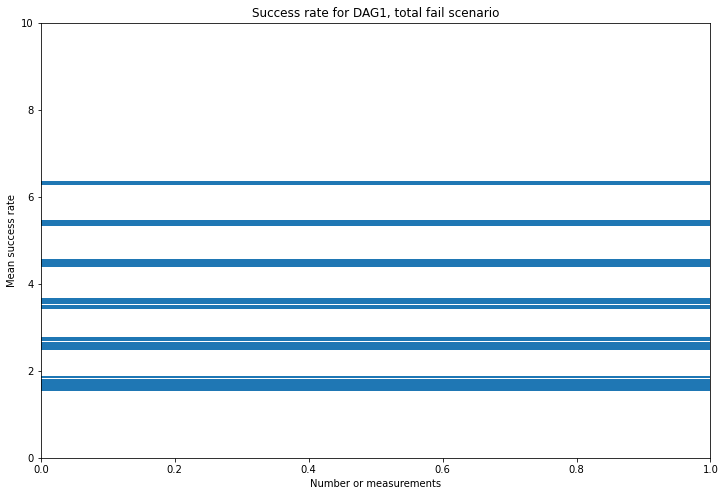

In [274]:

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_title('Success rate for DAG1, total fail scenario')
ax.set_xlabel('Number or measurements')
ax.set_ylabel('Mean success rate')
plt.ylim(0, 10)


sort_number = 0
max_success_rate = 0
for top_sort in top_sorts:
    sort_number += 1
    print("Sort number "+str(sort_number))
    sort_to_check = list(top_sort)
    print(sort_to_check)
    cur_success_rate = top_sort_success_rate(DG, sort_to_check)
    if (max_success_rate < cur_success_rate):
        max_success_rate = cur_success_rate
    ax.axhline(y=cur_success_rate, linestyle='-', label='Top sort '+str(sort_number)+' success rate')
   # if (sort_number >= 10):
      #  break
print(max_success_rate)

In [119]:
def sort_is_topological(DG, sorted_nodes):
    checked_nodes = set()
    for i in range(0, len(sorted_nodes)-1):
        node = sorted_nodes[i]
        checked_nodes.add(node)
        for pred in list(DG.predecessors(node)):
            if not (pred in checked_nodes):
                return False
    return True

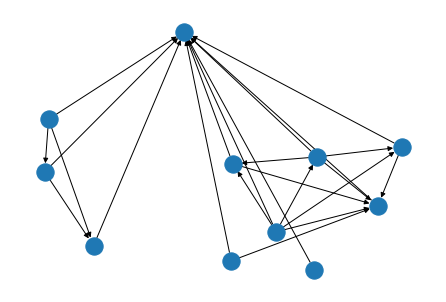

In [167]:
nx.draw(nx.algorithms.dag.transitive_closure_dag(DG))

In [185]:
"""
Next top sort is created by swapping two (random?) neighbouring NOT DEPENDANT nodes in initial top sort.
Dependancy is determined by transitive closure graph (TCG) of initial DAG (DG).
"""

def next_top_sort(top_sort, DG, TCG):
  #  print(top_sort)
    new_top_sort = top_sort.copy()
    
    while True:
        #Random neighbouring pairs
        res = choices(range(0, len(new_top_sort)-1))
    #    print(res[0])
    #    print(new_top_sort[res[0]:res[0]+2])
        p = res[0]
        pair = new_top_sort[p:p+2]
     #   print(TCG.has_edge(pair[0], pair[1]))
     #   print(TCG.has_edge(pair[1], pair[0]))
        if ((not TCG.has_edge(pair[0], pair[1])) and (not TCG.has_edge(pair[0], pair[1]))):
          #  print("Swapping")
            a = new_top_sort[p]
            new_top_sort[p] = new_top_sort[p+1] 
            new_top_sort[p+1] = a
          #  print(new_top_sort[p:p+2])
           # print("Is still top sort?")
           # print(sort_is_topological(DG, new_top_sort))
            return new_top_sort
    
    
TCG = nx.algorithms.dag.transitive_closure(DG)
top_sort = list(nx.topological_sort(DG))
ntop_sort = next_top_sort(top_sort, DG, TCG)
print(ntop_sort)


[6, 5, 1, 7, 3, 4, 9, 2, 0, 8, 10]


In [297]:
def run_bad_optimisation(start_top_sort, DG, TCG):
    top_sort = start_top_sort
    opt = []
    for i in range(0, 1000):
        ntop_sort = next_top_sort(top_sort, DG, TCG)
      #  print(top_sort_success_rate(DG, top_sort))
      #  print(top_sort_success_rate(DG, ntop_sort))
        old_rate = top_sort_success_rate(DG, top_sort)
        new_rate = top_sort_success_rate(DG, ntop_sort)
        if (old_rate < new_rate):
            top_sort = ntop_sort
            #print("Function maximized, accepting sort")
            opt.append(new_rate)
        else:
            opt.append(old_rate)

    print(opt[len(opt)-1])
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    plt.ylim(0, 7)
    ax.set_title('Bad probabilistic optimisation (no accept probability)')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Mean success rate')
    ax.plot(opt)


In [296]:
"""
Simple probabilistic optimisation algorithm.
If new top sort increases function, it is accepted. If not, it is accepted with some static access probability.
"""

def run_simple_optimisation(start_top_sort, DG, TCG):
    top_sort = start_top_sort
    opt = []
    for i in range(0, 1000):
        ntop_sort = next_top_sort(top_sort, DG, TCG)
      #  print(top_sort_success_rate(DG, top_sort))
      #  print(top_sort_success_rate(DG, ntop_sort))
        old_rate = top_sort_success_rate(DG, top_sort)
        new_rate = top_sort_success_rate(DG, ntop_sort)
        if (old_rate < new_rate):
            top_sort = ntop_sort
            #print("Function maximized, accepting sort")
            opt.append(new_rate)
        else:
            accept_prob = 0.05
            res = choices([0, 1], [1-accept_prob, accept_prob])
            if (res[0] == 1):
                top_sort = ntop_sort
              #  print("Accepted due to access prob")
                opt.append(new_rate)
            else:
                opt.append(old_rate)

    print(opt[len(opt)-1])
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    plt.ylim(0, 7)
    ax.set_title('Simple probabilistic optimisation')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Mean success rate')
    ax.plot(opt)


In [295]:
"""
Simulated annealing optimisation algorithm.
If new top sort increases function, it is accepted. If not, it is accepted with some static access probability.
"""

def run_simulated_annealing(start_top_sort, DG, TCG):
    top_sort = start_top_sort
    N = 1000
    d = np.array(range(1, N+1))
    d = 1/d
    opt = []
    opt.append(top_sort_success_rate(DG, top_sort))
    for i in range(0, 1000):
        ntop_sort = next_top_sort(top_sort, DG, TCG)
      #  print(top_sort_success_rate(DG, top_sort))
      #  print(top_sort_success_rate(DG, ntop_sort))
        old_rate = top_sort_success_rate(DG, top_sort)
        new_rate = top_sort_success_rate(DG, ntop_sort)
        if (old_rate < new_rate):
            top_sort = ntop_sort
            #print("Function maximized, accepting sort")
            opt.append(new_rate)
        else:
            accept_prob = math.exp((new_rate - old_rate)/d[i])
            res = choices([0, 1], [1-accept_prob, accept_prob])
            if (res[0] == 1):
                top_sort = ntop_sort
              #  print("Accepted due to access prob")
                opt.append(new_rate)
            else:
                opt.append(old_rate)

    print(opt[len(opt)-1])
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    plt.ylim(0, 7)
    ax.set_title('Simulated annealing optimisation')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Mean success rate')
    ax.plot(opt)


2.750000000000001
6.350000000000001
6.350000000000001


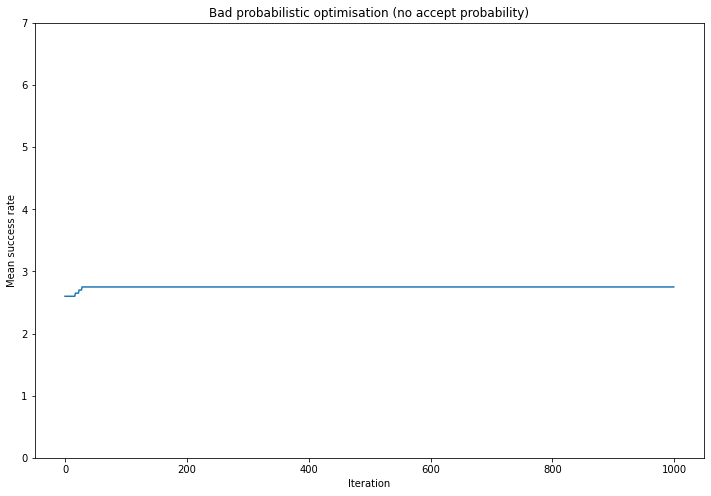

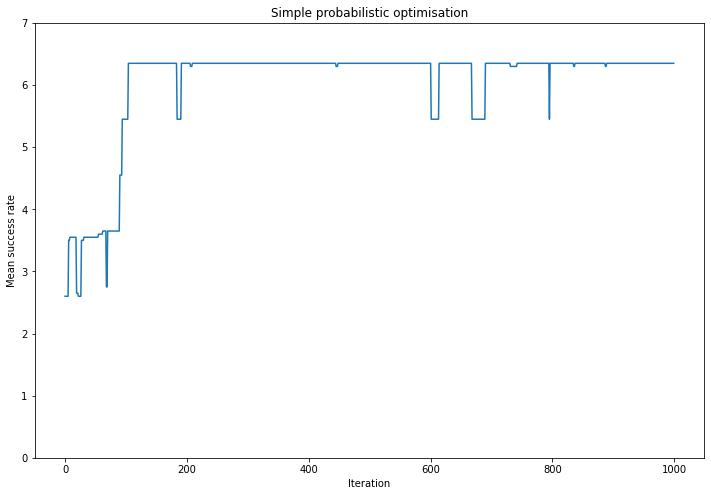

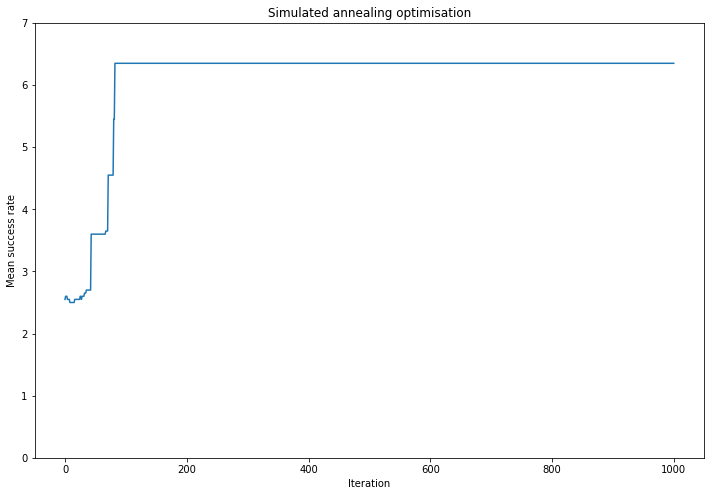

In [299]:

start_top_sort = list(nx.topological_sort(DG))
run_bad_optimisation(start_top_sort, DG, TCG)
run_simple_optimisation(start_top_sort, DG, TCG)
run_simulated_annealing(start_top_sort, DG, TCG)